In [7]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import math
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

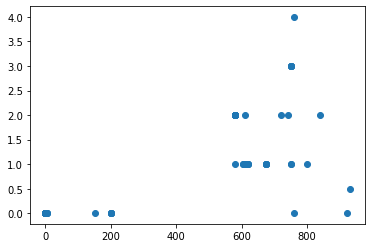

In [45]:
plt.scatter(df['HT_Temp'],df['HT_Time'])

/home/prasann/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/prasann/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


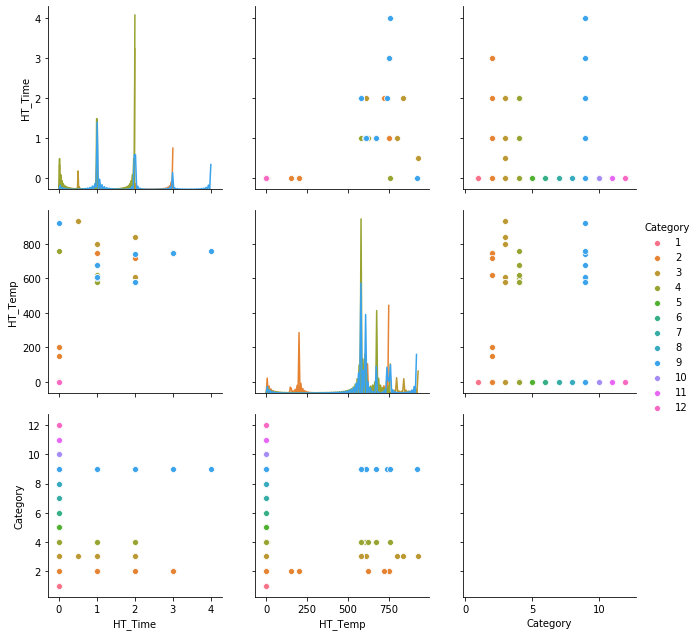

In [48]:
sns.pairplot(df[{'HT_Temp', 'HT_Time','Category' }], hue='Category' ,height=3);
plt.show()

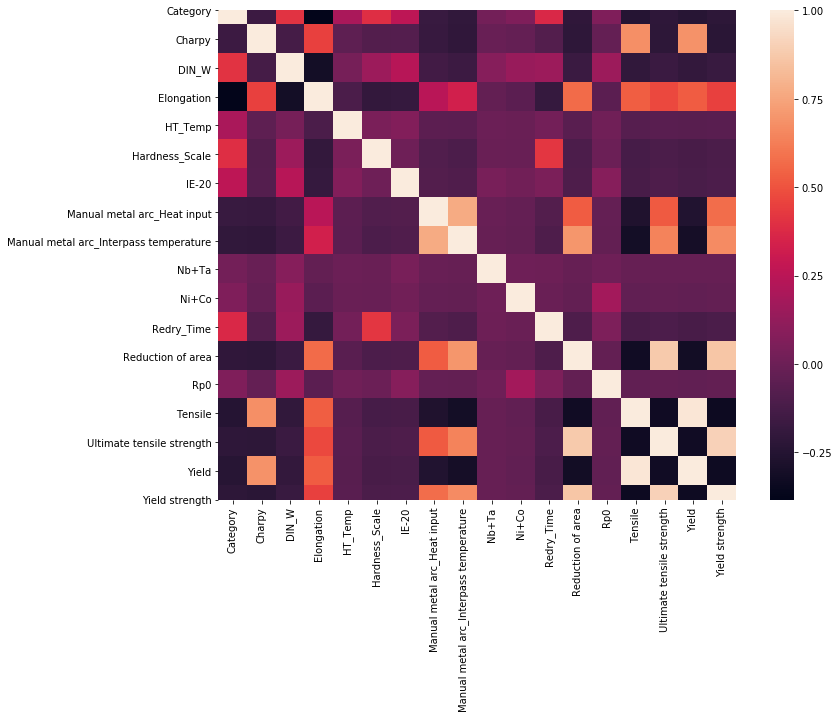

In [57]:
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, square=True)

In [ ]:
f, ax = plt.subplots(51,figsize=(12,9))
i = 0
for col in df.columns:
    sns.distplot(df[col], a=ax[i])
    i+=1
    

In [9]:
#Getting columns
for c in df.columns:
    print(c)


C
Charpy
Cr
Cu
Diffusible Hydrogen
Elongation
Lateral
Mn
Mn + Ni + Cr + Mo + V
Mo
Ni
P
P S
S
S Ni
Si
Tensile
V
Yield
aws
conformances
ind
key features
requirements
typic_results
typical applications
Elongation_Temperature
Reduction of area
Reduction of area_Temperature
Ultimate tensile strength
Ultimate tensile strength_Temperature
Yield strength
Yield strength_Temperature
Acicular ferrite
Acicular ferrite_Temperature
Ferrite with carbide aggregate
Ferrite with carbide aggregate_Temperature
Ferrite with second phase
Ferrite with second phase_Temperature
Primary ferrite in microstructure
Primary ferrite in microstructure_Temperature
50% FATT
50% FATT_Temperature
Hardness
Hardness_Temperature
Manual metal arc_Current
Manual metal arc_Electrode
Manual metal arc_Heat input
Manual metal arc_Interpass temperature
Manual metal arc_Source
Manual metal arc_Voltage
Post weld heat treatment_Post weld heat treatment temperature
Post weld heat treatment_Post weld heat treatment time
Flux cored arc_

In [11]:
pd.DataFrame(df.columns).to_json('columns.json', orient= 'index')

In [3]:
df = df.dropna(axis='columns', thresh = 250)

In [32]:
numvals = pd.DataFrame(df.count()).transpose()

In [36]:
numvals.to_json('value_counts.json', orient='index')

In [37]:
numvals.shape

(1, 73)

In [4]:
df

,C,Charpy,Cr,Cu,Elongation,Mn,Mo,Ni,P,S,...,Properties,Redry_Time,Rm,Rp0,Sn,Suitable_For,Ti,Zn,Zr,url
0,0.150,27.0,0.200,NaN,22.0,1.60,0.30,NaN,0.035,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.055,226.5,0.045,NaN,31.0,1.28,0.05,NaN,0.015,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,95.0,NaN,NaN,28.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.075,NaN,6.000,0.005,19.0,0.70,0.15,NaN,0.012,0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,0.080,NaN,0.000,0.000,NaN,0.60,0.00,0.0,0.000,0.000,...,6013 T is a thick coated electrode for joining...,2.0,560.0,360.0,0.0,\n\nDIN:Unalloyed steels:Boiler plates:Pipe st...,0.0,0.0,0.0,http://www.ceweld.nl/en/product/6013-t
3251,0.030,NaN,0.000,0.000,NaN,0.42,0.00,0.0,0.015,0.012,...,Extremely crack resistant weld metal condition...,1.0,505.0,400.0,0.0,\n\nMaterials\nEN\nASTM\n\n\nshipbuilding stee...,0.0,0.0,0.0,http://www.ceweld.nl/en/product/6018-lc
3252,0.100,NaN,0.000,0.000,NaN,0.40,0.50,0.0,0.000,0.000,...,Besides the excellent weld metal toughness pro...,0.0,550.0,420.0,0.0,"St:37.2, 44.2, 37.3, 52.3, H1, H11, 210.7, 290...",0.0,0.0,0.0,http://www.ceweld.nl/en/product/7010
3253,0.050,NaN,0.000,0.000,NaN,1.00,0.00,0.0,0.000,0.000,...,Doublcoated semi basic CTOD tested electrode w...,1.0,575.0,420.0,0.0,\n\nBase metal\nDIN\nEN\nASTM\n\n\nShipbuildin...,0.0,0.0,0.0,http://www.ceweld.nl/en/product/7016


In [84]:
get_elements(df)

""
0
1
10
100
1000
...
995
996
997
998


In [ ]:
df.to_json('composition_data.json', orient='index')

In [28]:
elements = get_elements(df)
get_elems_list(elements, elements.columns)

TypeError: must be real number, not str

In [45]:
tmp = get_data_rep(df)

                                               elements
0                             [C, Cr, Mn, Mo, P, Si, V]
1                             [C, Cr, Mn, Mo, P, Si, V]
2                                                    []
3                                                    []
4                         [C, Cr, Cu, Mn, Mo, P, S, Si]
...                                                 ...
3250  [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3251  [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3252  [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3253  [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3254  [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...

[3255 rows x 1 columns]


In [46]:
tmp['elements']

0                               [C, Cr, Mn, Mo, P, Si, V]
1                               [C, Cr, Mn, Mo, P, Si, V]
2                                                      []
3                                                      []
4                           [C, Cr, Cu, Mn, Mo, P, S, Si]
                              ...                        
3250    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3251    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3252    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3253    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3254    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
Name: elements, Length: 3255, dtype: object

In [101]:
tmp.select_dtypes(['number']).columns

Index(['Charpy', 'Elongation', 'Tensile', 'Yield', 'ind', 'Reduction of area',
       'Ultimate tensile strength', 'Yield strength',
       'Manual metal arc_Heat input', 'Manual metal arc_Interpass temperature',
       'extr', 'Category', 'DIN_W', 'HT_Temp', 'Hardness_Scale', 'IE-20',
       'Nb+Ta', 'Ni+Co', 'Others', 'Redry_Time', 'Rp0'],
      dtype='object')

In [74]:
df.to_hdf('new_final_data.hdf5', 'props')

/home/prasann/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['elements']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [58]:
pd.read_hdf('props_data.hdf5', 'props')['elements']

0                               [C, Cr, Mn, Mo, P, Si, V]
1                               [C, Cr, Mn, Mo, P, Si, V]
2                                                      []
3                                                      []
4                           [C, Cr, Cu, Mn, Mo, P, S, Si]
                              ...                        
3250    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3251    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3252    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3253    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3254    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
Name: elements, Length: 3255, dtype: object

In [75]:
df

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Nb+Ta,...,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength,extr,ind,elements
0,0.0,27.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,490.0,0.0,400.0,0.0,0.0,0.0,"[C, Cr, Mn, Mo, P, Si, V]"
1,0.0,226.5,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,557.5,0.0,470.0,0.0,0.0,1.0,"[C, Cr, Mn, Mo, P, Si, V]"
10,0.0,27.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,550.0,0.0,510.0,0.0,0.0,161.0,[]
100,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,550.0,0.0,460.0,0.0,0.0,289.0,"[C, Mn, Mo, P, S, Si]"
1000,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,150.0,0.0,...,0.0,78.8,0.0,0.0,560.0,0.0,484.0,1.0,0.0,"[C, Cu, Fe, Mn, P, S, Si]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[C, Fe, Mn, Ni, P, S, Si]"
996,0.0,0.0,0.0,26.6,0.0,0.0,0.0,1.0,200.0,0.0,...,0.0,70.8,0.0,0.0,677.0,0.0,584.0,1.0,0.0,"[C, Fe, Mn, Ni, P, S, Si]"
997,0.0,0.0,0.0,22.2,0.0,0.0,0.0,1.0,200.0,0.0,...,0.0,69.7,0.0,0.0,753.0,0.0,692.0,1.0,0.0,"[C, Fe, Mn, Ni, P, S, Si]"
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[C, Fe, Mn, Ni, P, S, Si]"


In [64]:
prop_counts

,Charpy,Elongation,Tensile,Yield,aws,conformances,ind,key features,requirements,typic_results,...,ISO,Name,Nb+Ta,Ni+Co,Others,Properties,Redry_Time,Rp0,Suitable_For,url
0,758,1618,919,919,944,513,944,583,944,944,...,630,661,661,661,661,581,661,413,644,661


In [65]:
df.to_json('prop_counts_2.json', orient='index')

In [ ]:
numerify_df(df)

In [70]:
df['Manual metal arc_Current'].

714

In [98]:
df['Hardness'] = df['Hardness'].str.split('(').str.get(0).astype(float)

In [4]:
notnulls(df.replace('N', np.nan),'Hardness')

NameError: name 'notnulls' is not defined

In [6]:
df = df.replace('N', np.nan)

In [7]:
df = numerify_df(df)

NameError: name 'numerify_df' is not defined

In [10]:
df = df.drop(axis='columns', columns = {'Manual metal arc_Electrode','Ultimate tensile strength_Temperature' })

In [13]:
oth_props = get_oth_props(df).select_dtypes(['number'])

In [14]:
tmp_df = get_data_rep(df)

                                               elements
0                             [C, Cr, Mn, Mo, P, Si, V]
1                             [C, Cr, Mn, Mo, P, Si, V]
2                                                    []
3                                                    []
4                         [C, Cr, Cu, Mn, Mo, P, S, Si]
...                                                 ...
3250  [A5, Ag, Al, B, Be, C, Co, Cr, Cu, Fe, Mg, Mn,...
3251  [A5, Ag, Al, B, Be, C, Co, Cr, Cu, Fe, Mg, Mn,...
3252  [A5, Ag, Al, B, Be, C, Co, Cr, Cu, Fe, Mg, Mn,...
3253  [A5, Ag, Al, B, Be, C, Co, Cr, Cu, Fe, Mg, Mn,...
3254  [Ag, Al, B, Be, C, Co, Cr, Cu, Fe, Mg, Mn, Mo,...

[3255 rows x 1 columns]


In [15]:
#tmp_df= df.drop(axis='columns', columns = {'Manual metal arc_Electrode','Ultimate tensile strength_Temperature' })
tmp_df = tmp_df.select_dtypes(['number']).join(tmp_df['elements'])

In [16]:
tmp_df

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Nb+Ta,...,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength,extr,ind,elements
0,NaN,27.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,490.0,NaN,400.0,NaN,NaN,0.0,"[C, Cr, Mn, Mo, P, Si, V]"
1,NaN,226.5,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,557.5,NaN,470.0,NaN,NaN,1.0,"[C, Cr, Mn, Mo, P, Si, V]"
10,NaN,27.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,550.0,NaN,510.0,NaN,NaN,161.0,[]
100,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,550.0,NaN,460.0,NaN,NaN,289.0,"[C, Mn, Mo, P, S, Si]"
1000,NaN,NaN,NaN,26.0,NaN,NaN,NaN,1.0,150.0,NaN,...,NaN,78.8,NaN,NaN,560.0,NaN,484.0,1.0,NaN,"[C, Cu, Fe, Mn, P, S, Si]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,"[C, Fe, Mn, Ni, P, S, Si]"
996,NaN,NaN,NaN,26.6,NaN,NaN,NaN,1.0,200.0,NaN,...,NaN,70.8,NaN,NaN,677.0,NaN,584.0,1.0,NaN,"[C, Fe, Mn, Ni, P, S, Si]"
997,NaN,NaN,NaN,22.2,NaN,NaN,NaN,1.0,200.0,NaN,...,NaN,69.7,NaN,NaN,753.0,NaN,692.0,1.0,NaN,"[C, Fe, Mn, Ni, P, S, Si]"
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,"[C, Fe, Mn, Ni, P, S, Si]"


In [ ]:
tmp_df.to_hdf('final_data.hdf', 'props')

In [69]:
df = pd.read_hdf('final_data.hdf', 'props')

In [2]:
df = pd.read_json('composition_data.json', orient = 'index')

In [20]:
tmp_df.columns

Index(['Category', 'Charpy', 'DIN_W', 'Elongation', 'HT_Temp',
       'Hardness_Scale', 'IE-20', 'Manual metal arc_Heat input',
       'Manual metal arc_Interpass temperature', 'Nb+Ta', 'Ni+Co', 'Others',
       'Redry_Time', 'Reduction of area', 'Rp0', 'Tensile',
       'Ultimate tensile strength', 'Yield', 'Yield strength', 'extr', 'ind',
       'elements'],
      dtype='object')

In [70]:
#tmp_df = tmp_df.drop(columns={'ind', 'Others'})
tmp_df = tmp_df.drop(columns={'extr'})

NameError: name 'tmp_df' is not defined

In [44]:
tmp_df

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Nb+Ta,Ni+Co,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength,elements
0,NaN,27.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.0,NaN,400.0,NaN,"[C, Cr, Mn, Mo, P, Si, V]"
1,NaN,226.5,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557.5,NaN,470.0,NaN,"[C, Cr, Mn, Mo, P, Si, V]"
10,NaN,27.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,NaN,510.0,NaN,[]
100,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,NaN,460.0,NaN,"[C, Mn, Mo, P, S, Si]"
1000,NaN,NaN,NaN,26.0,NaN,NaN,NaN,1.0,150.0,NaN,NaN,NaN,78.8,NaN,NaN,560.0,NaN,484.0,"[C, Cu, Fe, Mn, P, S, Si]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[C, Fe, Mn, Ni, P, S, Si]"
996,NaN,NaN,NaN,26.6,NaN,NaN,NaN,1.0,200.0,NaN,NaN,NaN,70.8,NaN,NaN,677.0,NaN,584.0,"[C, Fe, Mn, Ni, P, S, Si]"
997,NaN,NaN,NaN,22.2,NaN,NaN,NaN,1.0,200.0,NaN,NaN,NaN,69.7,NaN,NaN,753.0,NaN,692.0,"[C, Fe, Mn, Ni, P, S, Si]"
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[C, Fe, Mn, Ni, P, S, Si]"


In [29]:
df = tmp_df

In [96]:
df = df.drop(columns={'Nb+Ta', "Ni+Co", 'extr', 'ind', 'elements', 'Others'})

In [46]:
#np.mean(df)
tset, pval = ttest_1samp(df, 60)

In [71]:
df = df.fillna(0)

In [50]:
tset, pval = ttest_1samp(df, 60)

In [8]:
from scipy.stats import pearsonr



In [13]:
#get p-values, pearsonr correlation coefficients. Null Hypothesis is that 2 values are uncorrellated 
calculate_pvalues(df)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength
Category,0,0,0,0,0,0,0,0,0,0,0,0.0003,0,0,0,0
Charpy,0,0,0,0,0.006,0,0,0,0,0,0,0.1686,0,0,0,0
DIN_W,0,0,0,0,0.0587,0,0,0,0,0,0,0,0,0,0,0
Elongation,0,0,0,0,0,0,0,0,0,0,0,0.0015,0,0,0,0
HT_Temp,0,0.006,0.0587,0,0,0.011,0,0.0038,0.0009,0.1465,0.0006,0.4605,0,0.0005,0.0001,0.0003
Hardness_Scale,0,0,0,0,0.011,0,0.5525,0,0,0,0,0.994,0,0,0,0
IE-20,0,0,0,0,0,0.5525,0,0,0,0.0048,0,0,0,0,0,0
Manual metal arc_Heat input,0,0,0,0,0.0038,0,0,0,0,0,0,0.1473,0,0,0,0
Manual metal arc_Interpass temperature,0,0,0,0,0.0009,0,0,0,0,0,0,0.0963,0,0,0,0
Redry_Time,0,0,0,0,0.1465,0,0.0048,0,0,0,0,0.001,0,0,0,0


In [82]:
#Calculating 

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength
0,0.0,27.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,490.0,0.0,400.0,0.0
1,0.0,226.5,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,557.5,0.0,470.0,0.0
10,0.0,27.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,510.0,0.0
100,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,460.0,0.0
1000,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,150.0,0.0,78.8,0.0,0.0,560.0,0.0,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,26.6,0.0,0.0,0.0,1.0,200.0,0.0,70.8,0.0,0.0,677.0,0.0,584.0
997,0.0,0.0,0.0,22.2,0.0,0.0,0.0,1.0,200.0,0.0,69.7,0.0,0.0,753.0,0.0,692.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
val = abs(np.mean(df['Charpy'])-np.mean(df['DIN_W']))

In [28]:
ztest ,pval1 = stests.ztest(df['Charpy'], x2=df['DIN_W'], alternative='two-sided')

In [50]:
#Performs z test, switch ind to 1 to get p-values
get_corrs(df, stests.ztest, 0)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength
Category,0,22.301,-17.1722,50.019,5.9506,-19.2893,10.079,-14.9813,27.9859,-0.8738,27.9203,3.2971,35.0684,29.9874,34.2102,31.0915
Charpy,-22.301,0,-23.3833,-4.8798,-4.506,-23.5067,-4.0927,-23.2536,16.3386,-22.3144,0.0157,2.9668,31.5767,26.3806,30.0368,26.9484
DIN_W,17.1722,23.3833,0,53.8003,6.467,-5.6652,10.7899,5.5386,28.4669,8.4566,29.3005,3.3125,35.2183,30.1439,34.3876,31.2693
Elongation,-50.019,4.8798,-53.8003,0,-2.4558,-54.1722,-1.4315,-53.4109,20.0139,-48.5999,5.9622,3.0432,32.5887,27.4007,31.2731,28.1508
HT_Temp,-5.9506,4.506,-6.467,2.4558,0,-6.5274,1.1441,-6.4035,16.5982,-5.9978,4.6826,3.1167,32.0326,26.9815,30.4432,27.4785
Hardness_Scale,19.2893,23.5067,5.6652,54.1722,6.5274,0,10.8727,11.2097,28.5225,9.5802,29.4554,3.3143,35.2358,30.1622,34.4083,31.29
IE-20,-10.079,4.0927,-10.7899,1.4315,-1.1441,-10.8727,0,-10.703,17.6318,-10.1325,4.3568,3.0748,32.2244,27.1059,30.7447,27.7073
Manual metal arc_Heat input,14.9813,23.2536,-5.5386,53.4109,6.4035,-11.2097,10.703,0,28.4085,7.2809,29.138,3.3106,35.1999,30.1247,34.3659,31.2475
Manual metal arc_Interpass temperature,-27.9859,-16.3386,-28.4669,-20.0139,-16.5982,-28.5225,-17.6318,-28.4085,0,-28.0105,-16.8541,2.3789,25.0298,19.7229,22.2815,19.3244
Redry_Time,0.8738,22.3144,-8.4566,48.5999,5.9978,-9.5802,10.1325,-7.2809,28.0105,0,27.8702,3.2987,35.0808,30.0007,34.2243,31.106


In [33]:
def categories(series):
    return range(int(series.min()), int(series.max()) + 1)


def chi_square_df(df_col1,df_col2):
    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]
    return scs.chi2_contingency(result)


In [98]:
added = df + 0.00000000000000000001
added['Elongation']

0       2.200000e+01
1       3.100000e+01
10      2.400000e+01
100     1.900000e+01
1000    2.600000e+01
            ...     
995     1.000000e-20
996     2.660000e+01
997     2.220000e+01
998     1.000000e-20
999     2.400000e+01
Name: Elongation, Length: 3255, dtype: float64

In [99]:
scs.chi2_contingency(added[{'Charpy', 'Category'}])

(53356.5, 0.0, 3254, array([[2.55522476e+01, 1.44775238e+00],
        [2.14354966e+02, 1.21450339e+01],
        [2.55522476e+01, 1.44775238e+00],
        ...,
        [1.89275908e-20, 1.07240917e-21],
        [1.89275908e-20, 1.07240917e-21],
        [1.89275908e-20, 1.07240917e-21]]))

In [100]:
get_chi_corrs(added,scs.chi2_contingency, 0)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,...,P,Rm,S,Si,Sn,Ti,V,W,Zn,Zr
Category,0,0,590.419,0,25963.2,597.882,14703.3,0,0,1784.23,...,933.976,12095.3,1044.59,1240.3,1551.29,1723.98,570.082,1494.52,1813.09,270.024
Charpy,0,0,105.053,0,12465.4,46.8391,6768.18,0,0,396.313,...,18.595,0,3.3593,44.7235,82.5034,102.864,4.9108,83.5122,199.268,1.3873
DIN_W,590.419,105.053,0,105.053,27622.5,355.795,14945.9,105.053,105.053,1282.47,...,542.188,1761.95,455.173,576.379,632.89,632.007,328.327,604.154,901.035,215.505
Elongation,0,0,105.053,0,12465.4,46.8391,6768.18,0,0,396.313,...,18.595,0,3.3593,44.7235,82.5034,102.864,4.9108,83.5122,199.268,1.3873
HT_Temp,25963.2,12465.4,27622.5,12465.4,0,25066.9,53477.1,12465.4,12465.4,27663.8,...,27692.4,129659,26412.2,27368.2,28075.9,28142.6,22818.4,27494.1,28330.3,27905.8
Hardness_Scale,597.882,46.8391,355.795,46.8391,25066.9,0,19009.3,46.8391,46.8391,1054.6,...,149.804,7134.48,108.795,496.577,256.705,349.276,99.5804,270.826,525.701,72.2221
IE-20,14703.3,6768.18,14945.9,6768.18,53477.1,19009.3,0,6768.18,6768.18,16972.7,...,4417.78,80499.7,5189.41,16306.2,12237.8,30441.4,16842.2,21693.2,21503.4,23100.8
Manual metal arc_Heat input,0,0,105.053,0,12465.4,46.8391,6768.18,0,0,396.313,...,18.595,0,3.3593,44.7235,82.5034,102.864,4.9108,83.5122,199.268,1.3873
Manual metal arc_Interpass temperature,0,0,105.053,0,12465.4,46.8391,6768.18,0,0,396.313,...,18.595,0,3.3593,44.7235,82.5034,102.864,4.9108,83.5122,199.268,1.3873
Redry_Time,1784.23,396.313,1282.47,396.313,27663.8,1054.6,16972.7,396.313,396.313,0,...,1291.95,12932.6,1187.83,1476.21,1380.03,1470.54,977.632,1331.33,1672.15,1210.22


In [101]:
get_corrs(df, scs.ttest_ind, 0)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,...,P,Rm,S,Si,Sn,Ti,V,W,Zn,Zr
Category,0,-32.0505,-20.9355,-32.0505,6.3759,-29.113,11.2123,-32.0505,-32.0505,-3.1414,...,-29.4568,54.1587,-31.5783,-8.7234,-14.0404,-10.1244,-31.7597,-14.9729,-10.2719,-31.973
Charpy,32.0505,NaN,23.2812,NaN,6.8086,8.3555,11.8516,NaN,NaN,8.3863,...,3.1421,54.5266,1.347,3.8659,1.7375,1.7015,2.3444,1.9559,3.6042,1.2624
DIN_W,20.9355,-23.2812,0,-23.2812,6.6811,-15.5519,11.6632,-23.2812,-23.2812,4.8721,...,-16.0982,54.4185,-21.6543,-0.0601,-3.4265,-1.9837,-22.3833,-3.6791,-0.788,-23.0404
Elongation,32.0505,NaN,23.2812,NaN,6.8086,8.3555,11.8516,NaN,NaN,8.3863,...,3.1421,54.5266,1.347,3.8659,1.7375,1.7015,2.3444,1.9559,3.6042,1.2624
HT_Temp,-6.3759,-6.8086,-6.6811,-6.8086,0,-6.7808,1.0183,-6.8086,-6.8086,-6.4953,...,-6.7946,37.2946,-6.8062,-6.6796,-6.7645,-6.7462,-6.8061,-6.7636,-6.7016,-6.8079
Hardness_Scale,29.113,-8.3555,15.5519,-8.3555,6.7808,0,11.8104,-8.3555,-8.3555,7.6001,...,-2.4957,54.5029,-6.6738,2.9933,0.5864,0.8877,-7.2197,0.6944,2.6254,-8.0402
IE-20,-11.2123,-11.8516,-11.6632,-11.8516,-1.0183,-11.8104,0,-11.8516,-11.8516,-11.3794,...,-11.8307,41.446,-11.8479,-11.6532,-11.7818,-11.7503,-11.8478,-11.7813,-11.6872,-11.8505
Manual metal arc_Heat input,32.0505,NaN,23.2812,NaN,6.8086,8.3555,11.8516,NaN,NaN,8.3863,...,3.1421,54.5266,1.347,3.8659,1.7375,1.7015,2.3444,1.9559,3.6042,1.2624
Manual metal arc_Interpass temperature,32.0505,NaN,23.2812,NaN,6.8086,8.3555,11.8516,NaN,NaN,8.3863,...,3.1421,54.5266,1.347,3.8659,1.7375,1.7015,2.3444,1.9559,3.6042,1.2624
Redry_Time,3.1414,-8.3863,-4.8721,-8.3863,6.4953,-7.6001,11.3794,-8.3863,-8.3863,0,...,-7.9496,54.2399,-8.3091,-3.7356,-6.0457,-4.9721,-8.3137,-6.1746,-4.369,-8.3666


In [102]:
get_corrs(df, stests.ztest, 0)

/home/prasann/anaconda3/lib/python3.7/site-packages/statsmodels/stats/weightstats.py:655: RuntimeWarning: invalid value encountered in double_scalars
  zstat = (value1 - value2 - diff) / std_diff


,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,...,P,Rm,S,Si,Sn,Ti,V,W,Zn,Zr
Category,0,-32.0505,-20.9355,-32.0505,6.3759,-29.113,11.2123,-32.0505,-32.0505,-3.1414,...,-29.4568,54.1587,-31.5783,-8.7234,-14.0404,-10.1244,-31.7597,-14.9729,-10.2719,-31.973
Charpy,32.0505,NaN,23.2812,NaN,6.8086,8.3555,11.8516,NaN,NaN,8.3863,...,3.1421,54.5266,1.347,3.8659,1.7375,1.7015,2.3444,1.9559,3.6042,1.2624
DIN_W,20.9355,-23.2812,0,-23.2812,6.6811,-15.5519,11.6632,-23.2812,-23.2812,4.8721,...,-16.0982,54.4185,-21.6543,-0.0601,-3.4265,-1.9837,-22.3833,-3.6791,-0.788,-23.0404
Elongation,32.0505,NaN,23.2812,NaN,6.8086,8.3555,11.8516,NaN,NaN,8.3863,...,3.1421,54.5266,1.347,3.8659,1.7375,1.7015,2.3444,1.9559,3.6042,1.2624
HT_Temp,-6.3759,-6.8086,-6.6811,-6.8086,0,-6.7808,1.0183,-6.8086,-6.8086,-6.4953,...,-6.7946,37.2946,-6.8062,-6.6796,-6.7645,-6.7462,-6.8061,-6.7636,-6.7016,-6.8079
Hardness_Scale,29.113,-8.3555,15.5519,-8.3555,6.7808,0,11.8104,-8.3555,-8.3555,7.6001,...,-2.4957,54.5029,-6.6738,2.9933,0.5864,0.8877,-7.2197,0.6944,2.6254,-8.0402
IE-20,-11.2123,-11.8516,-11.6632,-11.8516,-1.0183,-11.8104,0,-11.8516,-11.8516,-11.3794,...,-11.8307,41.446,-11.8479,-11.6532,-11.7818,-11.7503,-11.8478,-11.7813,-11.6872,-11.8505
Manual metal arc_Heat input,32.0505,NaN,23.2812,NaN,6.8086,8.3555,11.8516,NaN,NaN,8.3863,...,3.1421,54.5266,1.347,3.8659,1.7375,1.7015,2.3444,1.9559,3.6042,1.2624
Manual metal arc_Interpass temperature,32.0505,NaN,23.2812,NaN,6.8086,8.3555,11.8516,NaN,NaN,8.3863,...,3.1421,54.5266,1.347,3.8659,1.7375,1.7015,2.3444,1.9559,3.6042,1.2624
Redry_Time,3.1414,-8.3863,-4.8721,-8.3863,6.4953,-7.6001,11.3794,-8.3863,-8.3863,0,...,-7.9496,54.2399,-8.3091,-3.7356,-6.0457,-4.9721,-8.3137,-6.1746,-4.369,-8.3666


In [18]:
aa

In [104]:
run_on_df(df, ttest_1samp)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,...,P,Rm,S,Si,Sn,Ti,V,W,Zn,Zr
0,2.280920e+01,2.368132e+01,1.848945e+01,54.731684,6.612161e+00,1.169999e+01,1.098894e+01,2.492634e+01,2.860070e+01,1.123418e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.932038e-107,1.618675e-114,1.168619e-72,0.000000,4.409963e-11,5.279163e-31,1.312732e-27,1.172125e-125,1.095876e-160,9.309256e-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
cov = df.cov()
get_heatmap(cov) 

In [106]:
df.to_csv("final_numeric_data.csv")

In [89]:
tmp = pd.read_json("composition_data.json", orient='index')

In [94]:
df = df.join(numerify_df(get_elements(tmp).drop(columns= {'A5'})))

In [107]:
df

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,...,P,Rm,S,Si,Sn,Ti,V,W,Zn,Zr
0,0.0,27.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035,NaN,NaN,0.75,NaN,NaN,0.08,NaN,NaN,NaN
1,0.0,226.5,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015,NaN,NaN,0.51,NaN,NaN,0.02,NaN,NaN,NaN
10,0.0,27.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030,NaN,0.030,0.40,NaN,NaN,NaN,NaN,NaN,NaN
1000,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,150.0,0.0,...,0.011,NaN,0.008,0.36,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013,NaN,0.007,0.33,NaN,NaN,NaN,NaN,NaN,NaN
996,0.0,0.0,0.0,26.6,0.0,0.0,0.0,1.0,200.0,0.0,...,0.013,NaN,0.007,0.33,NaN,NaN,NaN,NaN,NaN,NaN
997,0.0,0.0,0.0,22.2,0.0,0.0,0.0,1.0,200.0,0.0,...,0.013,NaN,0.007,0.36,NaN,NaN,NaN,NaN,NaN,NaN
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200.0,0.0,...,0.013,NaN,0.007,0.36,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
pd.read_csv('final_numeric_data.csv')

,Unnamed: 0,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,...,P,Rm,S,Si,Sn,Ti,V,W,Zn,Zr
0,0,0.0,27.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,...,0.035,NaN,NaN,0.75,NaN,NaN,0.08,NaN,NaN,NaN
1,1,0.0,226.5,0.0,31.0,0.0,0.0,0.0,0.0,0.0,...,0.015,NaN,NaN,0.51,NaN,NaN,0.02,NaN,NaN,NaN
2,10,0.0,27.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,...,0.030,NaN,0.030,0.40,NaN,NaN,NaN,NaN,NaN,NaN
4,1000,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,150.0,...,0.011,NaN,0.008,0.36,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013,NaN,0.007,0.33,NaN,NaN,NaN,NaN,NaN,NaN
3251,996,0.0,0.0,0.0,26.6,0.0,0.0,0.0,1.0,200.0,...,0.013,NaN,0.007,0.33,NaN,NaN,NaN,NaN,NaN,NaN
3252,997,0.0,0.0,0.0,22.2,0.0,0.0,0.0,1.0,200.0,...,0.013,NaN,0.007,0.36,NaN,NaN,NaN,NaN,NaN,NaN
3253,998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200.0,...,0.013,NaN,0.007,0.36,NaN,NaN,NaN,NaN,NaN,NaN


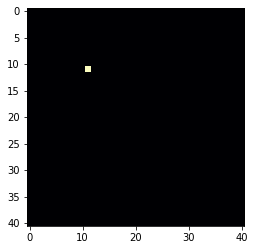

In [129]:
fig, ax = plt.subplots()
im = ax.imshow(cov.pow(3), cmap='magma')

In [126]:
cov.pow(3)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,...,P,Rm,S,Si,Sn,Ti,V,W,Zn,Zr
Category,1.129259e+02,-2.537500e+03,1.504295e-01,-1.215549e+03,3.505215e+04,1.083773e-01,3.375210e+04,-1.459696e-02,-4.876064e+04,3.709402e+01,...,4.035994e-04,-3.308181e+05,-1.129744e-06,6.444597e-03,-4.845427e-05,-5.161818e-01,-7.727120e-04,4.074665e-01,5.279957e-01,4.363409e-06
Charpy,-2.537500e+03,2.725387e+09,-2.699029e+01,9.593476e+06,-2.562325e+06,-5.356124e+00,-4.587769e+06,-8.025405e+01,-2.680858e+08,-1.968902e+03,...,-1.936550e-03,0.000000e+00,3.640674e-02,9.854261e-02,0.000000e+00,0.000000e+00,6.244795e+00,0.000000e+00,0.000000e+00,0.000000e+00
DIN_W,1.504295e-01,-2.699029e+01,4.503114e-02,-1.292927e+01,3.401202e+00,1.272319e-04,5.149807e+02,-1.552616e-04,-5.186460e+02,5.117350e-02,...,9.202961e-08,-6.971157e+03,-4.707170e-08,8.885935e-03,-8.046704e-04,6.869139e-01,-1.907498e-05,-3.282250e-02,-1.218980e-04,2.138788e-07
Elongation,-1.215549e+03,9.593476e+06,-1.292927e+01,4.103580e+06,-1.227441e+06,-2.565765e+00,-2.197697e+06,7.699922e+00,4.248823e+07,-9.431712e+02,...,-1.290182e-02,0.000000e+00,5.454042e-04,-1.251438e+00,0.000000e+00,0.000000e+00,2.926928e-02,-4.691768e-04,0.000000e+00,0.000000e+00
HT_Temp,3.505215e+04,-2.562325e+06,3.401202e+00,-1.227441e+06,1.940216e+11,6.470990e+00,2.905139e+07,-1.473977e+01,-4.923769e+07,5.014610e+02,...,-3.230899e-02,1.344012e+11,-9.045022e-04,-6.166946e+00,-1.472077e+03,-4.273703e+03,-1.617064e+00,-8.103907e+03,-3.221802e+04,-7.461309e-03
Hardness_Scale,1.083773e-01,-5.356124e+00,1.272319e-04,-2.565765e+00,6.470990e+00,2.762044e-02,3.226891e-02,-3.081110e-05,-1.029234e+02,8.534547e-01,...,8.870543e-08,-3.971417e+02,1.911610e-10,2.263017e-03,4.030517e-04,-5.354708e-03,7.378708e-05,8.106193e-06,1.133554e-17,7.725917e-08
IE-20,3.375210e+04,-4.587769e+06,5.149807e+02,-2.197697e+06,2.905139e+07,3.226891e-02,2.951960e+10,-2.639113e+01,-8.815865e+07,1.430816e+03,...,1.438974e+03,-1.337990e+11,-3.575322e-08,1.085690e+03,1.731669e+05,-3.937787e+03,-9.221254e+00,-1.463434e+03,1.244548e+06,-9.329778e-03
Manual metal arc_Heat input,-1.459696e-02,-8.025405e+01,-1.552616e-04,7.699922e+00,-1.473977e+01,-3.081110e-05,-2.639113e+01,6.631700e-02,6.758040e+04,-1.132611e-02,...,-7.962097e-07,0.000000e+00,-4.253070e-08,-2.625926e-04,0.000000e+00,0.000000e+00,-1.880274e-06,9.656159e-08,0.000000e+00,0.000000e+00
Manual metal arc_Interpass temperature,-4.876064e+04,-2.680858e+08,-5.186460e+02,4.248823e+07,-4.923769e+07,-1.029234e+02,-8.815865e+07,6.758040e+04,3.242870e+11,-3.783446e+04,...,-3.117747e+00,0.000000e+00,-1.645701e-01,-8.118062e+02,0.000000e+00,0.000000e+00,-5.388455e+00,5.175098e-01,0.000000e+00,0.000000e+00
Redry_Time,3.709402e+01,-1.968902e+03,5.117350e-02,-9.431712e+02,5.014610e+02,8.534547e-01,1.430816e+03,-1.132611e-02,-3.783446e+04,4.762586e+03,...,-4.485257e-05,7.552157e+05,-4.977071e-06,1.056710e-02,-8.981090e-01,-2.189054e+00,2.496938e-03,-9.796679e-02,-1.981101e+01,-5.517655e-06


In [62]:
#Imports
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import math
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline

In [63]:
#Useful methods
def get_elems_list(row, cols):
    elem_comb = {}
    elem_list = []
    i = 0
    for a in row:
        if not math.isnan(a):
            elem_list.append(cols[i])
        i+=1
    elem_comb['elements'] = elem_list
    return elem_comb

def get_data_rep(df):
    elements = get_elements(df)
    ecols = elements.columns
    data = df.drop(columns = ecols)
    e = pd.DataFrame()
    for i in range (0, len(elements)):
        e =e.append(get_elems_list(elements.loc[i], ecols), ignore_index=True)
    print(e)
    data['elements'] = e['elements']
    return data

def get_oth_props(df):
    elements = get_elements(df)
    ecols = elements.columns
    data = df.drop(columns = ecols)
    return data
def get_chi_corrs(df, func, ind):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            try:
                a  = []
                a.append(r)
                a.append(c)
                pvalues[r][c] = round(func(df[a])[ind], 4)
            except:
                print('err here')
    return pvalues

def run_on_df(df, f):
    a = pd.DataFrame()
    for c in df.columns:
        a[c] = f(df[c],0)
    return a

def get_heatmap(df):
    return df.style.background_gradient(cmap='magma') 

def get_corrs(df, func, ind):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(func(df[r], df[c])[ind], 4)

    return pvalues

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

def notnulls(data, col):
    return data[data[col].notnull()][col]

def get_counts_df(data):
    return pd.DataFrame(data.count()).transpose()

def numerify_df(data):
    for c in data.columns:
        try:
            data[c] = data[c].astype(float)
        except:
            print(c)
    return data

def drop_txt_rows(data):
    for col in data.columns:
        if data[col].dtype ==object:
            data = data.drop(col, axis=1)  
    data = data.fillna(0)
    return data

def get_elements(df):
    new_cols = []
    for c in df.columns:
        if len(c)<3:
            new_cols.append(c)
            
    return df[new_cols]

def get_pwr_corrs(df, func):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            if r==c:
                pvalues[r][c]=0
            else:
                pvalues[r][c] = round(np.mean(get_power(df, r, c, func)[0]), 4)

    return pvalues
            

In [74]:
#Data Analysis Visualization, Run From this cell onwawrds to get 
#Get Data
df = pd.read_csv("final_numeric_data.csv").drop(columns = {'Unnamed: 0'})
#df = df.drop(columns={'Nb+Ta', "Ni+Co", 'extr', 'ind', 'elements', 'Others'})
df = numerify_df(df).astype(float)
df = df.fillna(0)
added = df + 0.00000000000000000001

In [48]:
#P value Testing, Z test
pval = get_heatmap(get_corrs(df, stests.ztest, 0))
#Z test
ztest = get_heatmap(get_corrs(df, stests.ztest, 1))
#T test - 
#2 way T-Test
ttest = get_heatmap(get_corrs(df, scs.ttest_ind, 0))
#1 way T-Test
ttest_ind = run_on_df(df, ttest_1samp)
                      
#Chi squared
chi = get_heatmap(get_chi_corrs(added,scs.chi2_contingency, 0))
#Co-variance
cov = get_heatmap(df.cov())
#Co-relation
corr = get_heatmap(df.corr())
#Variance, ANOVA test
var = df.var()
#power


In [52]:
pval.to_excel("stats/pvals.xlsx")
cov.to_excel("stats/cov.xlsx")
chi.to_excel("stats/chi.xlsx")
var.to_excel("stats/var.xlsx")
ttest.to_excel("stats/ttestt.xlsx")
ttest_ind.to_excel("stats/ttest_ind.xlsx")
ztest.to_excel("stats/ztest.xlsx")

In [65]:
from skbio.stats.power import subsample_power
import pyspark

In [77]:
np.mean(get_power(df, "Yield", "Yield strength", scs.pearsonr)[0])

/home/prasann/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/prasann/anaconda3/lib/python3.7/site-packages/skbio/stats/power.py:759: RuntimeWarning: invalid value encountered in less
  w = (p_values < alpha).sum(axis=1)/p_values.shape[1]


0.048314285714285705

In [84]:
power = get_pwr_corrs(df, scs.pearsonr)

/home/prasann/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/prasann/anaconda3/lib/python3.7/site-packages/skbio/stats/power.py:759: RuntimeWarning: invalid value encountered in less
  w = (p_values < alpha).sum(axis=1)/p_values.shape[1]


KeyboardInterrupt: 

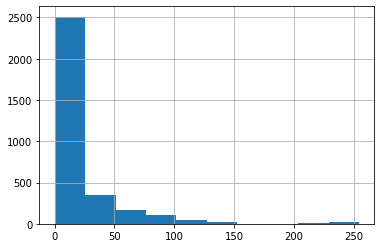

In [31]:
df['Charpy'].hist()

Index(['Category', 'Charpy', 'DIN_W', 'Elongation', 'HT_Temp',
       'Hardness_Scale', 'IE-20', 'Manual metal arc_Heat input',
       'Manual metal arc_Interpass temperature', 'Redry_Time',
       'Reduction of area', 'Rp0', 'Tensile', 'Ultimate tensile strength',
       'Yield', 'Yield strength', 'Ag', 'Al', 'B', 'Be', 'C', 'Co', 'Cr', 'Cu',
       'Fe', 'Mg', 'Mn', 'Mo', 'N', 'Nb', 'Ni', 'P', 'Rm', 'S', 'Si', 'Sn',
       'Ti', 'V', 'W', 'Zn', 'Zr'],
      dtype='object')

In [51]:
numvals = pd.DataFrame(df.count()).transpose()

In [39]:
for c in numvals.columns:
    print(c + " " + str(df[c][0]))

Category 0.0
Charpy 27.0
DIN_W 0.0
Elongation 22.0
HT_Temp 0.0
Hardness_Scale 0.0
IE-20 0.0
Manual metal arc_Heat input 0.0
Manual metal arc_Interpass temperature 0.0
Redry_Time 0.0
Reduction of area 0.0
Rp0 0.0
Tensile 490.0
Ultimate tensile strength 0.0
Yield 400.0
Yield strength 0.0
Ag 0.0
Al 0.0
B 0.0
Be 0.0
C 0.15
Co 0.0
Cr 0.2
Cu 0.0
Fe 0.0
Mg 0.0
Mn 1.6
Mo 0.30000000000000004
N 0.0
Nb 0.0
Ni 0.0
P 0.035
Rm 0.0
S 0.0
Si 0.75
Sn 0.0
Ti 0.0
V 0.08
W 0.0
Zn 0.0
Zr 0.0


In [52]:
df.astype(bool).sum(axis=0)


Category                                   661
Charpy                                     758
DIN_W                                      341
Elongation                                1618
HT_Temp                                     50
Hardness_Scale                             201
IE-20                                      297
Manual metal arc_Heat input                714
Manual metal arc_Interpass temperature     676
Redry_Time                                 302
Reduction of area                          704
Rp0                                        411
Tensile                                    919
Ultimate tensile strength                  728
Yield                                      919
Yield strength                             779
Ag                                        2612
Al                                        2675
B                                         2621
Be                                        2607
C                                         3098
Co           

In [53]:
df = pd.read_hdf("final_data.hdf", "props")

In [67]:
elems = pd.Index(df['elements'])

In [95]:
keys = elems.value_counts().keys()

In [89]:
vals = elems.value_counts().values

In [99]:
for i in range(0, len(vals)):
    print(str(keys[i])+" "+str(vals[i]))

['C', 'Fe', 'Mn', 'P', 'S', 'Si'] 471
['A5', 'Ag', 'Al', 'B', 'Be', 'C', 'Co', 'Cr', 'Cu', 'Fe', 'Mg', 'Mn', 'Mo', 'N', 'Nb', 'Ni', 'P', 'Rm', 'S', 'Si', 'Sn', 'Ti', 'V', 'W', 'Zn', 'Zr'] 425
[] 369
['C', 'Cr', 'Cu', 'Fe', 'Mn', 'Mo', 'Ni', 'P', 'S', 'Si', 'V'] 266
['C', 'Fe', 'Mn', 'P', 'S', 'Si', 'V'] 239
['Ag', 'Al', 'B', 'Be', 'C', 'Co', 'Cr', 'Cu', 'Fe', 'Mg', 'Mn', 'Mo', 'N', 'Nb', 'Ni', 'P', 'S', 'Si', 'Sn', 'Ti', 'V', 'W', 'Zn', 'Zr'] 189
['C', 'Cr', 'Fe', 'Mn', 'Mo', 'Ni', 'P', 'S', 'Si', 'V'] 94
['C', 'Cu', 'Fe', 'Mn', 'Mo', 'P', 'S', 'Si', 'V'] 79
['C', 'Cr', 'Mn', 'Mo', 'Ni', 'P', 'Si', 'V'] 73
['C', 'Cr', 'Fe', 'Mn', 'P', 'S', 'Si'] 65
['C', 'Cr', 'Fe', 'Mn', 'Mo', 'P', 'S', 'Si', 'V'] 62
['C', 'Cr', 'Mn', 'Mo', 'Ni', 'Si'] 56
['C', 'Co', 'Cr', 'Cu', 'Fe', 'Mn', 'Mo', 'Ni', 'P', 'S', 'Si', 'V'] 54
['C', 'Co', 'Cr', 'Fe', 'Mn', 'P', 'S', 'Si', 'V'] 50
['C', 'Mn', 'P', 'S', 'Si'] 46
['C', 'Fe', 'Mn', 'Ni', 'P', 'S', 'Si'] 46
['C', 'Cr', 'Cu', 'Fe', 'Mn', 'Mo', 'Ni', 'P', 'S'

/home/prasann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/prasann/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/prasann/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


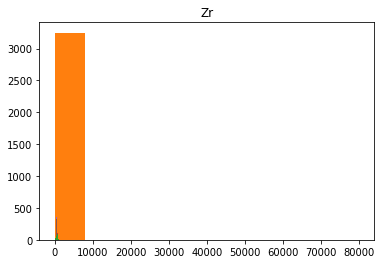

In [20]:
fig = plt.figure()
axs = [0]*50
i =0
for c in df.columns:
    axs[i]= fig.add_subplot(111)
    axs[i].hist(df[c])
    axs[i].set_title(c)
    i+=1

/home/prasann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


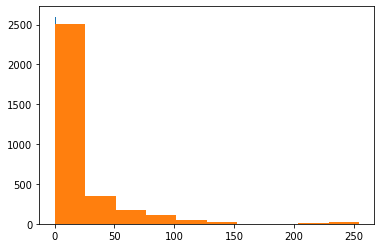

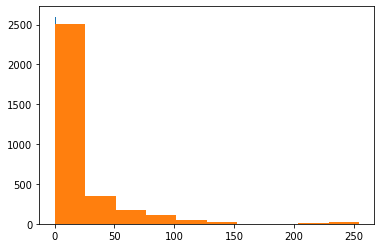

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(df['Category'])
ax1.title
ax1 = fig.add_subplot(111)
ax1.hist(df['Charpy'])

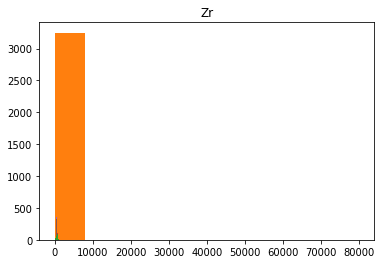

In [21]:
fig

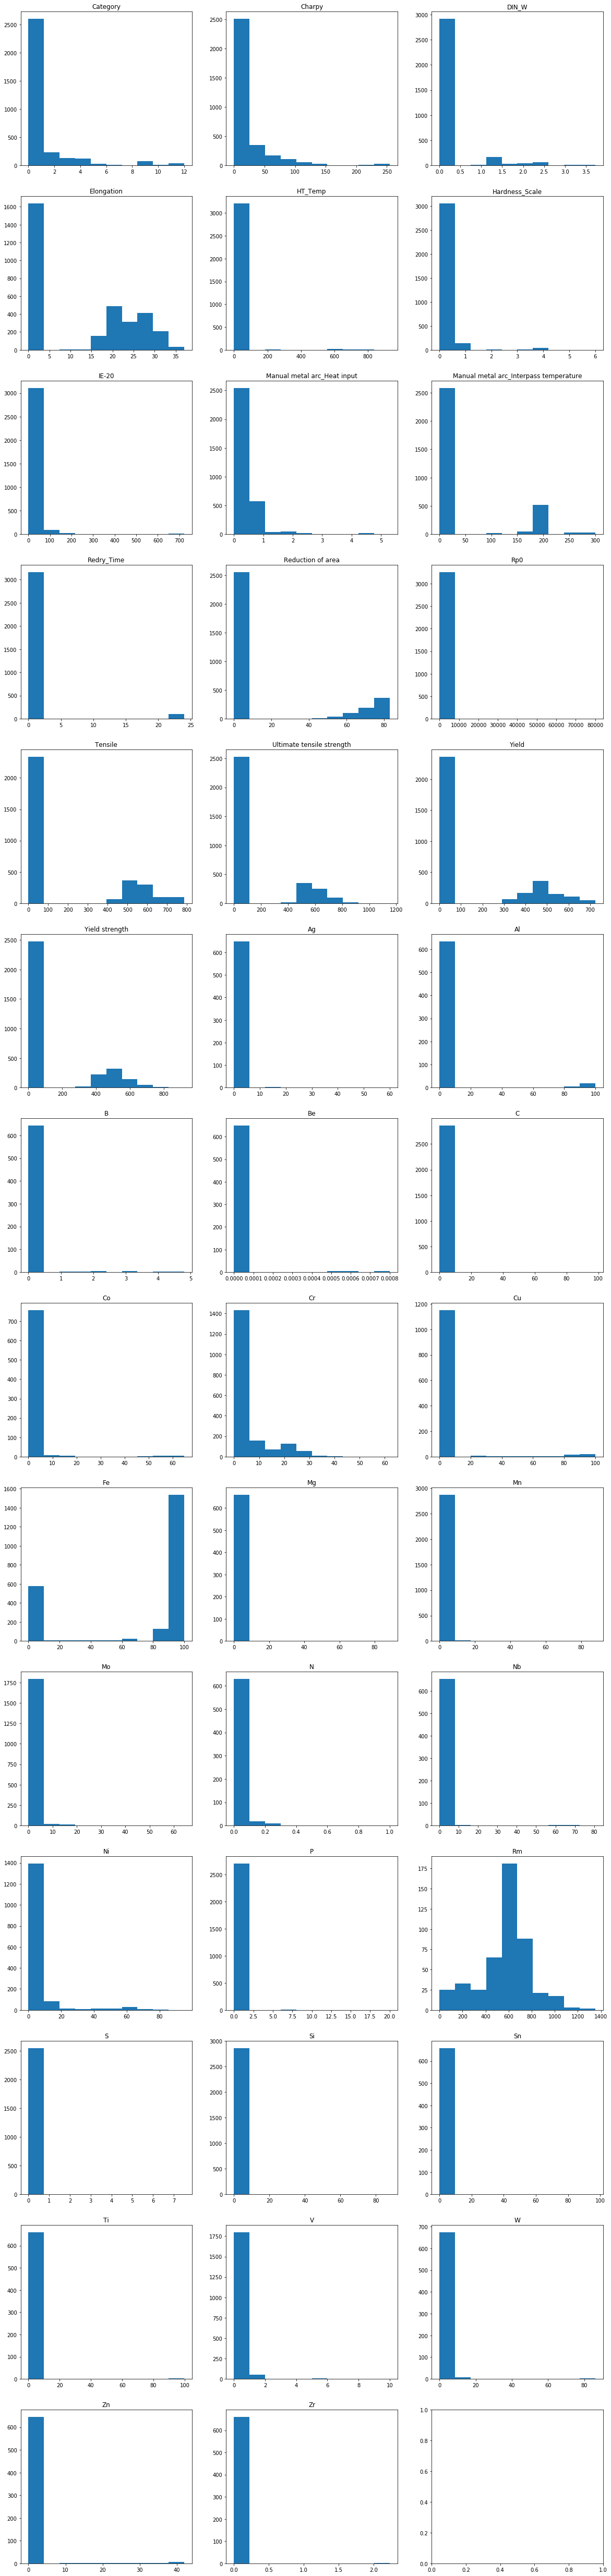

In [43]:
fig, axs = plt.subplots(14,3, figsize=(20, 90), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5, wspace=.001)
i=0
axs = axs.ravel()
for c in df.columns:
    axs[i].hist(df[c])
    axs[i].set_title(c)
    i+=1

In [60]:
np.mean(get_power(df, "Yield", "Yield strength", scs.pearsonr)[0])

/home/prasann/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/prasann/anaconda3/lib/python3.7/site-packages/skbio/stats/power.py:759: RuntimeWarning: invalid value encountered in less
  w = (p_values < alpha).sum(axis=1)/p_values.shape[1]


0.049257142857142854

In [67]:
import mxnet as mx

In [81]:
def get_pwr_corrs(df, func):
    #df = df.dropna()._get_numeric_data()
    mxn = mx.nd.array(df)
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in range(0,41):
        for c in range(0,41):
            if r==c:
                pvalues[r][c]=0
            else:
                pvalues[r][c] = round(np.mean(get_power(mxn, r, c, func)[0]), 4)

    return pvalues

def get_power(df, c1, c2, func):
    samples = df[:, [c1, c2]].transpose()
    f = lambda samples: func(samples[0],samples[1])[1]
    return subsample_power(test=f,
                        samples=samples, 
                        max_counts=10,
                        min_counts=3,
                        counts_interval=1,
                        draw_mode="ind",
                        alpha_pwr=0.05
                       )

In [79]:
power = get_pwr_corrs(df, scs.pearsonr)

KeyError: 0

In [82]:
np.mean(get_power(df, 5, 6, scs.pearsonr)[0])

TypeError: '(slice(None, None, None), [5, 6])' is an invalid key